# Gerando features de distancias 

Features baseadas no trabalho: http://repositorio.unicamp.br/jspui/bitstream/REPOSIP/331191/1/Barbieri_Luciana_M.pdf

In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import IPython.display as ipd
import numpy as np
import pandas as pd
from IPython.display import Audio
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import pickle

In [2]:
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [3]:
base = pd.read_csv('base_clean.csv')
base.head()

,dir,key_img,frame,dir_lbl,label,cat_labels,reduced_labels
0,extended-cohn-kanade-images\cohn-kanade-images...,S005001,1,Emotion_labels\Emotion\S005\001\S005_001_00000...,0.0,neutral,0
1,extended-cohn-kanade-images\cohn-kanade-images...,S005001,2,Emotion_labels\Emotion\S005\001\S005_001_00000...,0.0,neutral,0
2,extended-cohn-kanade-images\cohn-kanade-images...,S005001,3,Emotion_labels\Emotion\S005\001\S005_001_00000...,0.0,neutral,0
3,extended-cohn-kanade-images\cohn-kanade-images...,S005001,4,Emotion_labels\Emotion\S005\001\S005_001_00000...,0.0,neutral,0
4,extended-cohn-kanade-images\cohn-kanade-images...,S005001,5,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1


In [4]:
base.shape

(5876, 7)

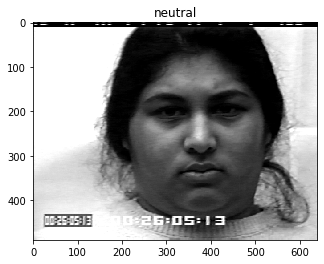

In [5]:
i = 0

path = base['dir'].values[i]
img1 = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

label = base['cat_labels'].values[i]
plt.title(label)
plt.imshow(img1)
plt.show()

In [6]:
points = [18,20,22,38,40,37,42,23,25,27,45,47,46,43,34,52,55,58,49]
points = [p - 1 for p in points]
points

[17, 19, 21, 37, 39, 36, 41, 22, 24, 26, 44, 46, 45, 42, 33, 51, 54, 57, 48]

Wall time: 56.9 ms


(-0.5, 639.5, 489.5, -0.5)

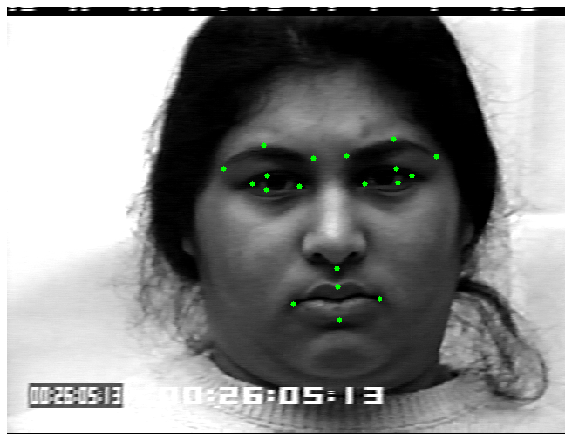

In [7]:
%%time
rects = detector(img1, 0)
rects

for k,d in enumerate(rects): #For each detected face  
    shape = predictor(img1, d) #Get coordinates
    for i in points:
#     for i in range(1,68): #There are 68 landmark points on each face
        cv2.circle(img1, (shape.part(i).x, shape.part(i).y), 3, (0,255,0), thickness=-1) #For each point, draw a red circle with thickness2 on the original frame

            
plt.figure(figsize=(10,10))
plt.imshow(img1) #Display the frame
plt.axis('off')
# plt.savefig('/content/drive/My Drive/Jupyter COLAB/Affective computing/Final project/Dlib_landmarks/landmarks.png')

In [8]:
def get_array(shape_i):
    '''
        Essa função pega um elemento do shape do DLIB e retorna um array
        de 2 dimensões com suas posições x e y
        
        parâmetros:
            shape_i: um elemento (i) de um landmarks object
            
        returns:
            coord: array 2-D de coordenadas do elemento
    '''
    
    x = shape_i.x
    y = shape_i.y
    
    return np.array([x,y])

def get_distances(shape):
    '''
        Essa função gera as features espaciais de acordo com o trabalho da Luciana Barbieri [1] seguindo o esquema
        de landmark do DLIB
        
        parâmetros:
            shape: landmarks object
        
        returns:
            distances: array com os vetores de distância no formato dataframe para ter os nomes das colunas
        
    '''
    
    # Vetor de pontos necessários para calcular as distâncias
    points = []
    
    # Array com as distancias em ordem do trabalho base
    distances = []
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 1
    v1 = get_array(shape.part(19))
    v2 = get_array(shape.part(39))
    
    d1 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d1)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 2
    v1 = get_array(shape.part(39))
    v2 = get_array(shape.part(51))
    
    d2 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d2)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 3
    v1 = get_array(shape.part(51))
    v2 = get_array(shape.part(57))
    
    d3 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d3)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 4
    v1 = get_array(shape.part(48))
    v2 = get_array(shape.part(54))
    
    d4 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d4)

    #-----------#-------#--------------#---------------------#
    
    ## Distancia 5
    v1 = get_array(shape.part(48))
    v2 = get_array(shape.part(54))
    v3 = get_array(shape.part(51))
    
    d5 = np.abs(np.cross(v2-v1,v3-v1))/np.linalg.norm(v2-v1)
    
    # Adicionando no vetor
    distances.append(d5)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 6
    v1 = get_array(shape.part(48))
    v2 = get_array(shape.part(54))
    v3 = get_array(shape.part(57))
    
    d6 = np.abs(np.cross(v2-v1,v3-v1))/np.linalg.norm(v2-v1)
    
    # Adicionando no vetor
    distances.append(d6)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 7
    v1 = get_array(shape.part(24))
    v2 = get_array(shape.part(42))
    
    d7 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d7)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 8
    v1 = get_array(shape.part(42))
    v2 = get_array(shape.part(51))
    
    d8 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d8)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 9
    v1 = get_array(shape.part(19))
    v2 = get_array(shape.part(21))
    
    d9 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d9)

    #-----------#-------#--------------#---------------------#
    
    ## Distancia 10
    v1 = get_array(shape.part(24))
    v2 = get_array(shape.part(22))
    
    d10 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d10)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 11
    v1 = get_array(shape.part(21))
    v2 = get_array(shape.part(22))
    
    d11 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d11)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 12
    v1 = get_array(shape.part(19))
    v2 = get_array(shape.part(37))
    
    d12 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d12)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 13
    v1 = get_array(shape.part(24))
    v2 = get_array(shape.part(44))
    
    d13 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d13)

    #-----------#-------#--------------#---------------------#
    
    ## Distancia 14
    v1 = get_array(shape.part(21))
    v2 = get_array(shape.part(39))
    
    d14 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d14)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 15
    v1 = get_array(shape.part(22))
    v2 = get_array(shape.part(42))
    
    d15 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d15)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 16
    v1 = get_array(shape.part(21))
    v2 = get_array(shape.part(37))
    
    d16 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d16)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 17
    v1 = get_array(shape.part(22))
    v2 = get_array(shape.part(44))
    
    d17 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d17)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 18
    v1 = get_array(shape.part(37))
    v2 = get_array(shape.part(41))
    
    d18 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d18)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 19
    v1 = get_array(shape.part(44))
    v2 = get_array(shape.part(46))
    
    d19 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d19)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 20
    v1 = get_array(shape.part(21))
    v2 = get_array(shape.part(51))
    
    d20 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d20)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 21
    v1 = get_array(shape.part(22))
    v2 = get_array(shape.part(51))
    
    d21 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d21)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 22
    v1 = get_array(shape.part(19))
    v2 = get_array(shape.part(17))
    
    d22 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d22)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 23
    v1 = get_array(shape.part(24))
    v2 = get_array(shape.part(26))
    
    d23 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d23)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 24
    v1 = get_array(shape.part(19))
    v2 = get_array(shape.part(36))
    
    d24 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d24)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 25
    v1 = get_array(shape.part(24))
    v2 = get_array(shape.part(45))
    
    d25 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d25)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 26
    v1 = get_array(shape.part(17))
    v2 = get_array(shape.part(37))
    
    d26 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d26)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 27
    v1 = get_array(shape.part(26))
    v2 = get_array(shape.part(44))
    
    d27 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d27)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 28
    v1 = get_array(shape.part(21))
    v2 = get_array(shape.part(33))
    
    d28 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d28)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 29
    v1 = get_array(shape.part(22))
    v2 = get_array(shape.part(33))
    
    d29 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d29)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 30
    v1 = get_array(shape.part(39))
    v2 = get_array(shape.part(33))
    
    d30 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d30)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 31
    v1 = get_array(shape.part(42))
    v2 = get_array(shape.part(33))
    
    d31 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d31)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 32
    v1 = get_array(shape.part(57))
    v2 = get_array(shape.part(33))
    
    d32 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d32)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 33
    v1 = get_array(shape.part(51))
    v2 = get_array(shape.part(33))
    
    d33 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d33)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 34
    v1 = get_array(shape.part(48))
    v2 = get_array(shape.part(33))
    
    d34 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d34)
    
    #-----------#-------#--------------#---------------------#
    
    ## Distancia 35
    v1 = get_array(shape.part(54))
    v2 = get_array(shape.part(33))
    
    d35 = np.linalg.norm(v1-v2)
    
    # Adicionando no vetor
    distances.append(d35)
    
    #-----------#-------#--------------#---------------------#
                    # Fim features #
    #-----------#-------#--------------#---------------------#
    
    return distances

# Gerando dataframe com features de distancias

In [9]:
columns = ['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14','d15','d16','d17','d18','d19','d20',
              'd21','d22','d23','d24','d25','d26','d27','d28','d29','d30','d31','d32','d33','d34','d35']

In [10]:
features = []

for img_path in base['dir'].values:
    # Le a imagem
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    
    # Extrai o elemento landmarks do dlib
    for k,d in enumerate(rects): #For each detected face  
        shape = predictor(img, d) #Get coordinates

    # Pega o vetor das distâncias a partir do elemento landmarks
    dist = get_distances(shape)
    
    # Adiciona na matrix de features
    features.append(dist)

features = pd.DataFrame(features, columns = columns)
print(features.shape)
features.head()

(5876, 35)


,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35
0,62.369865,123.130013,38.052595,99.181652,16.878122,21.173271,60.745370,122.004098,58.940648,57.245087,...,50.635956,48.083261,128.860390,129.468143,103.368274,102.142058,59.076222,21.023796,64.660653,60.216277
1,61.619802,122.776219,37.054015,98.249682,16.386821,20.661644,60.745370,122.004098,58.694122,57.245087,...,51.478151,46.840154,127.882759,128.390031,102.459748,100.881118,59.033889,22.000000,65.299311,59.405387
2,62.369865,123.130013,37.054015,98.183502,15.908986,21.144082,59.908263,122.971541,58.940648,56.648036,...,51.788030,48.383882,128.097619,127.475488,102.883429,101.833197,59.033889,22.000000,64.660653,59.405387
3,61.619802,121.840059,38.052595,99.181652,15.879953,22.171440,58.523500,122.262014,59.203040,57.939624,...,51.623638,48.083261,124.739729,124.486947,101.133575,101.513546,60.074953,22.022716,64.660653,60.216277
4,58.051701,122.560189,38.052595,100.079968,14.948046,23.101526,57.982756,121.297156,60.728906,59.093147,...,52.952809,49.979996,119.641130,120.415946,101.980390,100.568385,60.074953,22.022716,63.411355,61.032778


In [11]:
features['label'] = base['label']
features['cat_labels'] = base['cat_labels']
features['reduced_labels'] = base['reduced_labels']

In [12]:
features.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d29,d30,d31,d32,d33,d34,d35,label,cat_labels,reduced_labels
0,62.369865,123.130013,38.052595,99.181652,16.878122,21.173271,60.745370,122.004098,58.940648,57.245087,...,129.468143,103.368274,102.142058,59.076222,21.023796,64.660653,60.216277,0.0,neutral,0
1,61.619802,122.776219,37.054015,98.249682,16.386821,20.661644,60.745370,122.004098,58.694122,57.245087,...,128.390031,102.459748,100.881118,59.033889,22.000000,65.299311,59.405387,0.0,neutral,0
2,62.369865,123.130013,37.054015,98.183502,15.908986,21.144082,59.908263,122.971541,58.940648,56.648036,...,127.475488,102.883429,101.833197,59.033889,22.000000,64.660653,59.405387,0.0,neutral,0
3,61.619802,121.840059,38.052595,99.181652,15.879953,22.171440,58.523500,122.262014,59.203040,57.939624,...,124.486947,101.133575,101.513546,60.074953,22.022716,64.660653,60.216277,0.0,neutral,0
4,58.051701,122.560189,38.052595,100.079968,14.948046,23.101526,57.982756,121.297156,60.728906,59.093147,...,120.415946,101.980390,100.568385,60.074953,22.022716,63.411355,61.032778,3.0,disgust,-1


In [13]:
# Salvando base
features.to_csv('base_features_espaciais_1.csv', index = False)

# testando modelo rapidamente

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [17]:
df = features[features['reduced_labels'] != -99]

In [18]:
lr = LogisticRegression(random_state = 42)
rf = RandomForestClassifier(random_state = 42, n_estimators=100, max_depth = 30)
svc = SVC(C = 0.001, max_iter = 10000, random_state = 42)

cross_val_score(svc, df[columns], df['reduced_labels'] ,cv = 5, scoring  = 'accuracy')

c:\users\lucas\anaconda3\envs\keras-gpu\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lucas\anaconda3\envs\keras-gpu\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lucas\anaconda3\envs\keras-gpu\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lucas\anaconda3\envs\kera

array([0.51586489, 0.51536885, 0.51536885, 0.51589744, 0.51589744])